# Clustering Tutorial: K-Means and DBSCAN

**Instructor: Dr. Arun B Ayyar**

**Date:** 17.02.2025 AN

---

This notebook contains practical exercises on K-Means and DBSCAN clustering algorithms with diverse datasets.

Each problem includes:
- **Problem statement** with dataset description
- **Hints** including scikit-learn functions to use
- **Complete solution** with code and visualizations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs, make_moons, make_circles, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

---
# Part 1: K-Means Clustering

K-Means works best with:
- Spherical/globular clusters
- Similar-sized clusters
- Well-separated clusters

We'll test it on 4 different datasets to understand when it works and when it fails.

## Problem 1: Iris Dataset (4D → 2D with PCA)

**Dataset:** Iris flower measurements (150 samples, 4 features)

**Tasks:**
1. Load the Iris dataset
2. Standardize the features
3. Use the elbow method to find optimal k (test k=2 to 10)
4. Apply K-Means with optimal k
5. Reduce to 2D using PCA for visualization
6. Visualize clusters and calculate silhouette score

**Hints:**
- Use `load_iris()` from sklearn.datasets
- Use `StandardScaler()` for standardization
- Use `KMeans(n_clusters=k, random_state=42)` for clustering
- Plot inertia (WCSS) vs k for elbow method
- Use `PCA(n_components=2)` for dimensionality reduction
- Use `silhouette_score()` to evaluate clustering quality

### Solution 1

In [2]:
# Load and prepare data
iris = load_iris()
X_iris = iris.data
y_true = iris.target

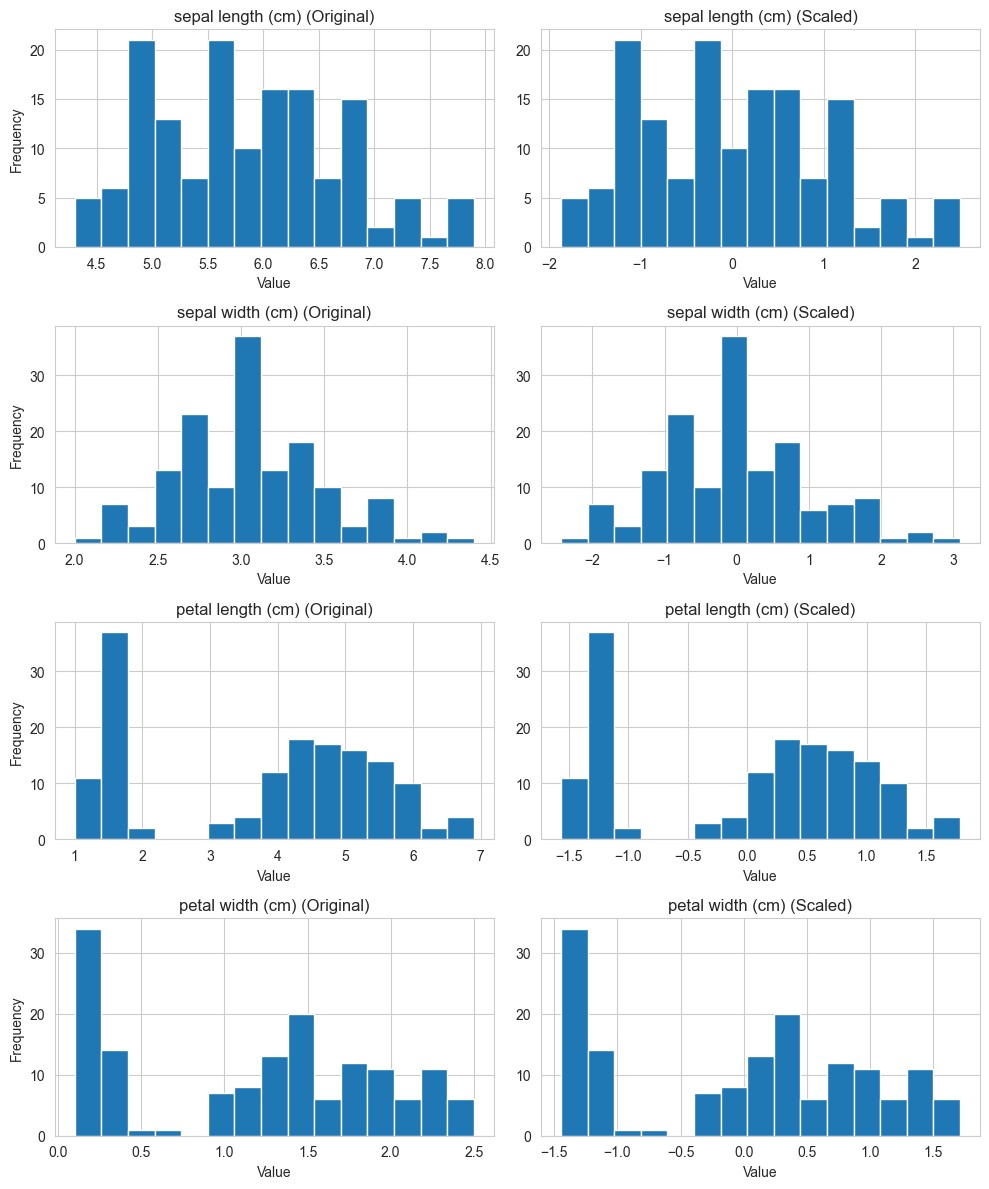

In [3]:
# Load data
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))

for i in range(4):
    # Left column: original
    axes[i, 0].hist(X[:, i], bins=15)
    axes[i, 0].set_title(f"{feature_names[i]} (Original)")
    axes[i, 0].set_ylabel("Frequency")

    # Right column: scaled
    axes[i, 1].hist(X_scaled[:, i], bins=15)
    axes[i, 1].set_title(f"{feature_names[i]} (Scaled)")
    
    # Align x-axis labels
    axes[i, 0].set_xlabel("Value")
    axes[i, 1].set_xlabel("Value")

plt.tight_layout()
plt.show()

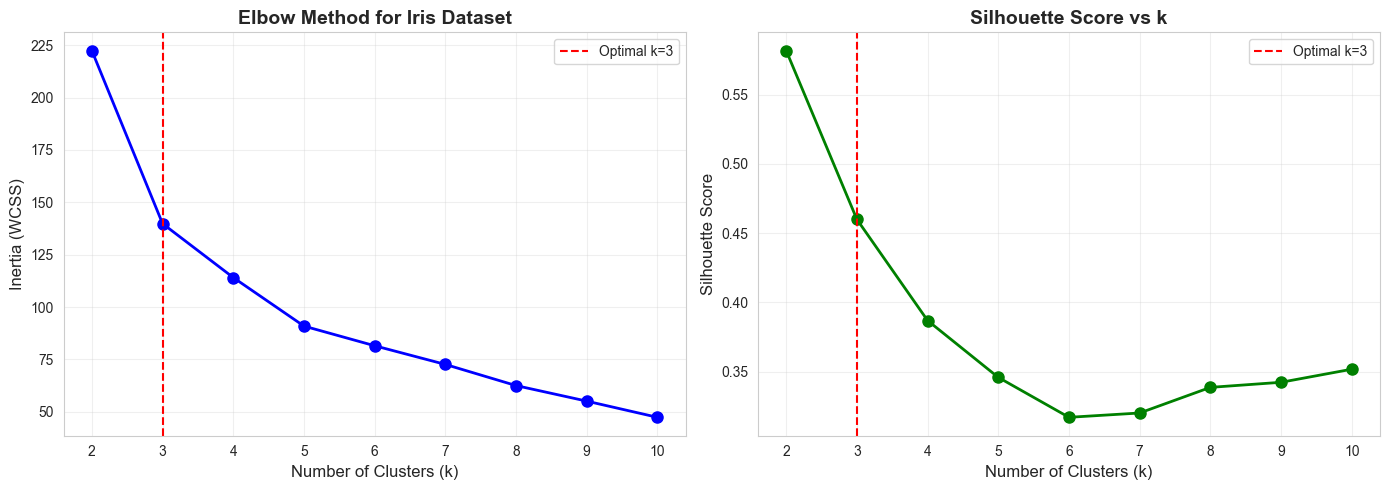

Optimal k from elbow: 3
Silhouette score at k=3: 0.460


In [4]:


# Standardize
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Elbow method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_iris_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_iris_scaled, kmeans.labels_))

# Plot elbow
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia (WCSS)', fontsize=12)
axes[0].set_title('Elbow Method for Iris Dataset', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=3, color='r', linestyle='--', label='Optimal k=3')
axes[0].legend()

axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score vs k', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x=3, color='r', linestyle='--', label='Optimal k=3')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Optimal k from elbow: 3")
print(f"Silhouette score at k=3: {silhouette_scores[1]:.3f}")

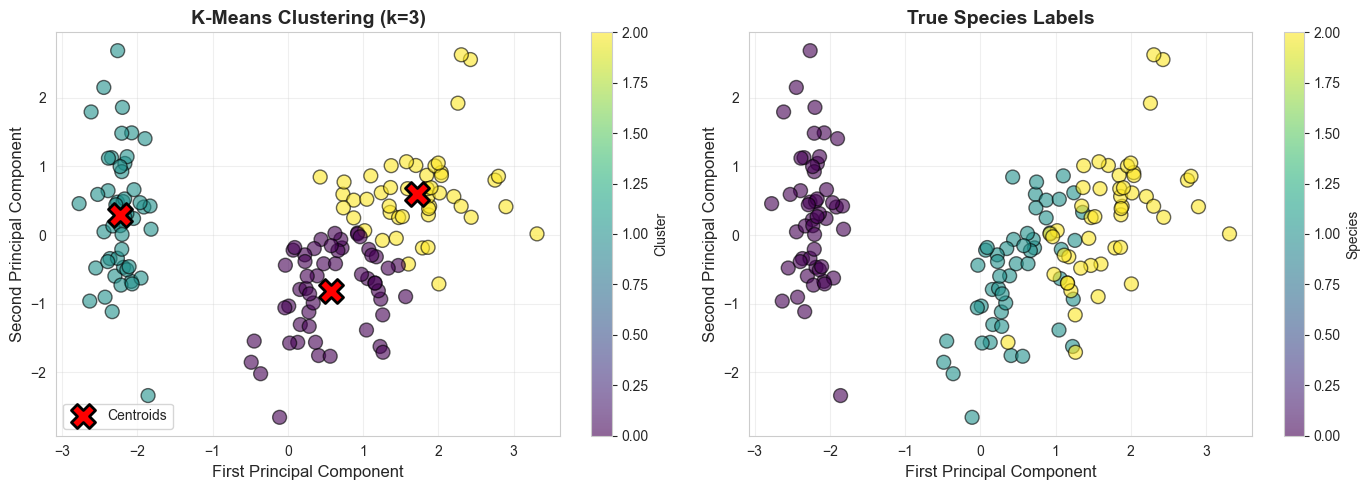


Silhouette Score: 0.460
Davies-Bouldin Index: 0.834 (lower is better)

K-Means works well on Iris: spherical clusters with good separation


In [5]:
# Apply K-Means with k=3
kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_iris = kmeans_iris.fit_predict(X_iris_scaled)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_iris_2d = pca.fit_transform(X_iris_scaled)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# K-Means clusters
scatter1 = axes[0].scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=labels_iris, cmap='viridis', s=100, alpha=0.6, edgecolors='k')
axes[0].scatter(pca.transform(kmeans_iris.cluster_centers_)[:, 0], 
                pca.transform(kmeans_iris.cluster_centers_)[:, 1], 
                c='red', marker='X', s=300, edgecolors='black', linewidths=2, label='Centroids')
axes[0].set_xlabel('First Principal Component', fontsize=12)
axes[0].set_ylabel('Second Principal Component', fontsize=12)
axes[0].set_title('K-Means Clustering (k=3)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# True labels
scatter2 = axes[1].scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=y_true, cmap='viridis', s=100, alpha=0.6, edgecolors='k')
axes[1].set_xlabel('First Principal Component', fontsize=12)
axes[1].set_ylabel('Second Principal Component', fontsize=12)
axes[1].set_title('True Species Labels', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Species')

plt.tight_layout()
plt.show()

print(f"\nSilhouette Score: {silhouette_score(X_iris_scaled, labels_iris):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_iris_scaled, labels_iris):.3f} (lower is better)")
print(f"\nK-Means works well on Iris: spherical clusters with good separation")

## Problem 2: Customer Segmentation (Synthetic Data)

**Dataset:** Customer data with Annual Income and Spending Score (200 samples)

**Tasks:**
1. Generate synthetic customer data with 5 natural clusters
2. Use elbow method to find optimal k
3. Apply K-Means clustering
4. Visualize and interpret customer segments
5. Provide business insights for each segment

**Hints:**
- Use `make_blobs(n_samples=200, n_features=2, centers=5, cluster_std=1.0, random_state=42)`
- Features represent: [Annual Income (k$), Spending Score (1-100)]
- Use `KMeans(n_clusters=k, random_state=42)`
- Calculate cluster statistics (mean income, mean spending) for each segment

### Solution 2

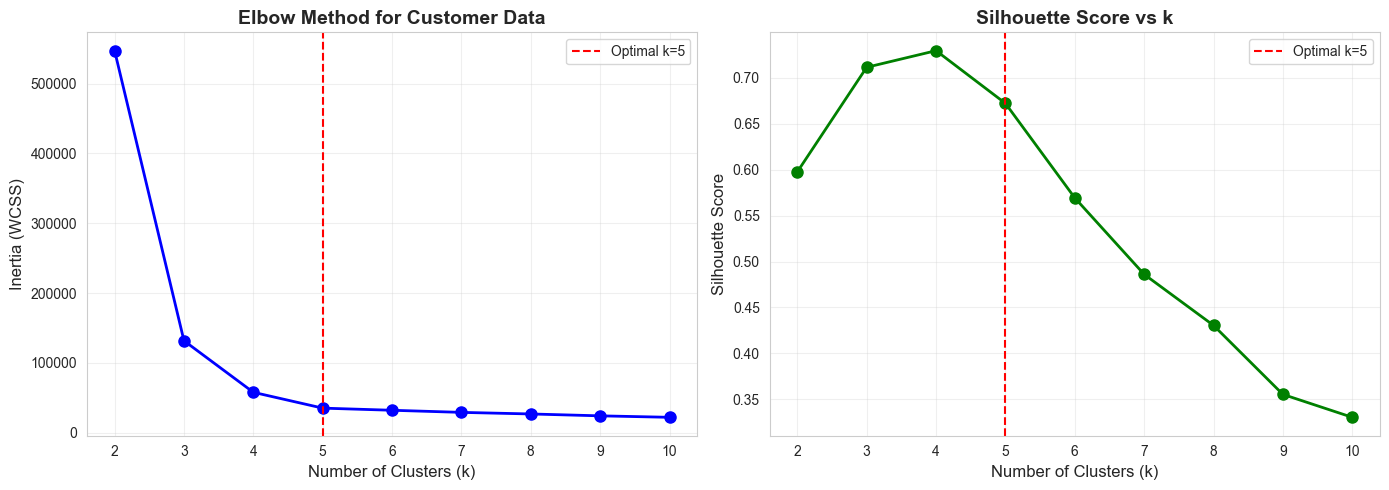

Optimal k: 5
Silhouette score at k=5: 0.672


In [6]:
# Generate customer data
X_customers, _ = make_blobs(n_samples=200, n_features=2, centers=5, cluster_std=1.0, random_state=42)

# Scale to realistic ranges
X_customers[:, 0] = X_customers[:, 0] * 10 + 50  # Annual Income: 30-70k
X_customers[:, 1] = X_customers[:, 1] * 10 + 50  # Spending Score: 30-70

# Elbow method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_customers)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_customers, kmeans.labels_))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia (WCSS)', fontsize=12)
axes[0].set_title('Elbow Method for Customer Data', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=5, color='r', linestyle='--', label='Optimal k=5')
axes[0].legend()

axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score vs k', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x=5, color='r', linestyle='--', label='Optimal k=5')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Optimal k: 5")
print(f"Silhouette score at k=5: {silhouette_scores[3]:.3f}")

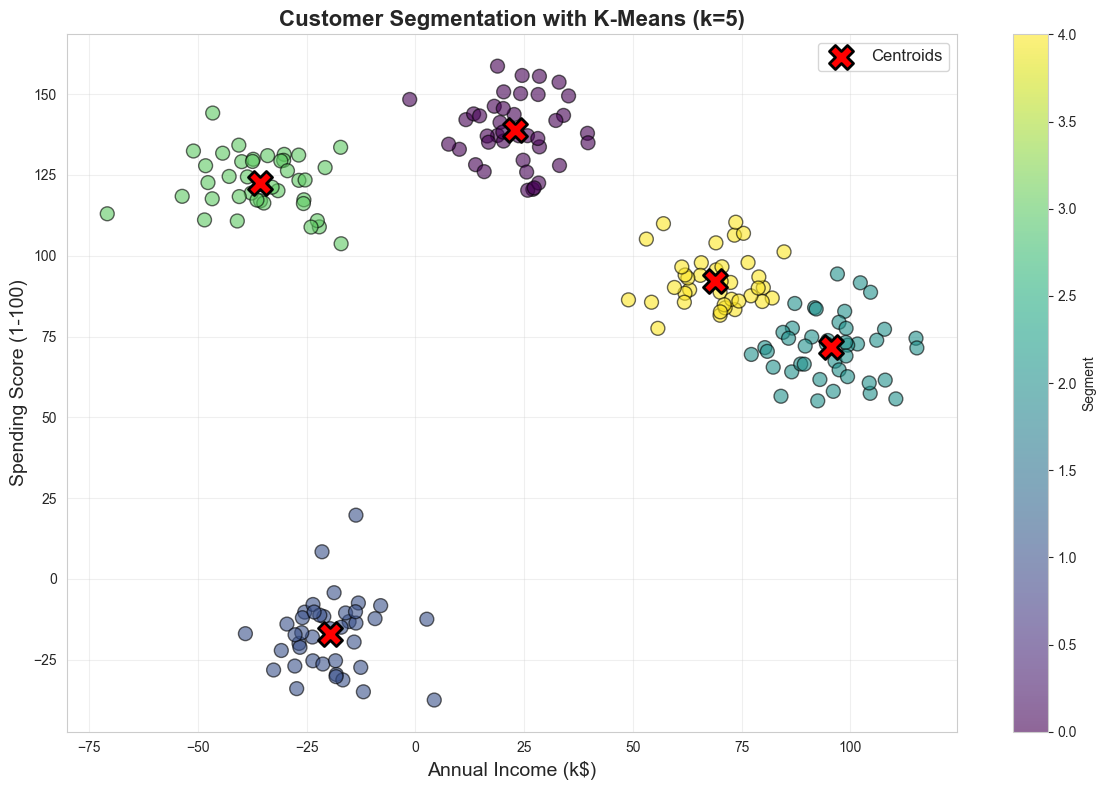

Customer Segment Analysis:

Segment 0: 40 customers
  Avg Income: $22.9k, Avg Spending: 138.8
  Aspirational: Budget-conscious but willing to spend

Segment 1: 40 customers
  Avg Income: $-19.6k, Avg Spending: -17.0
  Budget Segment: Price-sensitive, focus on value

Segment 2: 42 customers
  Avg Income: $95.5k, Avg Spending: 71.6
  High Value: Premium customers - target for luxury products

Segment 3: 40 customers
  Avg Income: $-35.7k, Avg Spending: 122.6
  Aspirational: Budget-conscious but willing to spend

Segment 4: 38 customers
  Avg Income: $68.9k, Avg Spending: 92.3
  High Value: Premium customers - target for luxury products

K-Means excels at customer segmentation with well-separated groups


In [7]:
# Apply K-Means with k=5
kmeans_customers = KMeans(n_clusters=5, random_state=42, n_init=10)
labels_customers = kmeans_customers.fit_predict(X_customers)

# Visualize
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_customers[:, 0], X_customers[:, 1], c=labels_customers, cmap='viridis', s=100, alpha=0.6, edgecolors='k')
plt.scatter(kmeans_customers.cluster_centers_[:, 0], kmeans_customers.cluster_centers_[:, 1], 
            c='red', marker='X', s=300, edgecolors='black', linewidths=2, label='Centroids')
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.title('Customer Segmentation with K-Means (k=5)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.colorbar(scatter, label='Segment')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Business insights
print("Customer Segment Analysis:\n")
for i in range(5):
    cluster_data = X_customers[labels_customers == i]
    avg_income = cluster_data[:, 0].mean()
    avg_spending = cluster_data[:, 1].mean()
    size = len(cluster_data)
    print(f"Segment {i}: {size} customers")
    print(f"  Avg Income: ${avg_income:.1f}k, Avg Spending: {avg_spending:.1f}")
    
    # Business interpretation
    if avg_income > 55 and avg_spending > 55:
        print(f"  High Value: Premium customers - target for luxury products")
    elif avg_income > 55 and avg_spending < 45:
        print(f"  High Income, Low Spending: Potential for upselling")
    elif avg_income < 45 and avg_spending > 55:
        print(f"  Aspirational: Budget-conscious but willing to spend")
    elif avg_income < 45 and avg_spending < 45:
        print(f"  Budget Segment: Price-sensitive, focus on value")
    else:
        print(f"  Average: Balanced income and spending")
    print()

print(f"K-Means excels at customer segmentation with well-separated groups")

## Problem 3: Anisotropic Blobs (Stretched Clusters)

**Dataset:** 3 clusters with different shapes and orientations (300 samples)

**Tasks:**
1. Generate anisotropic blob data
2. Apply K-Means with k=3
3. Visualize the results
4. Analyze why K-Means struggles with this data

**Hints:**
- Use `make_blobs()` with `cluster_std=[1.0, 2.5, 0.5]` for different cluster spreads
- Apply transformation matrix to create anisotropy
- Use `KMeans(n_clusters=3, random_state=42)`
- Compare cluster assignments with true labels
- Note: K-Means assumes spherical clusters!

### Solution 3

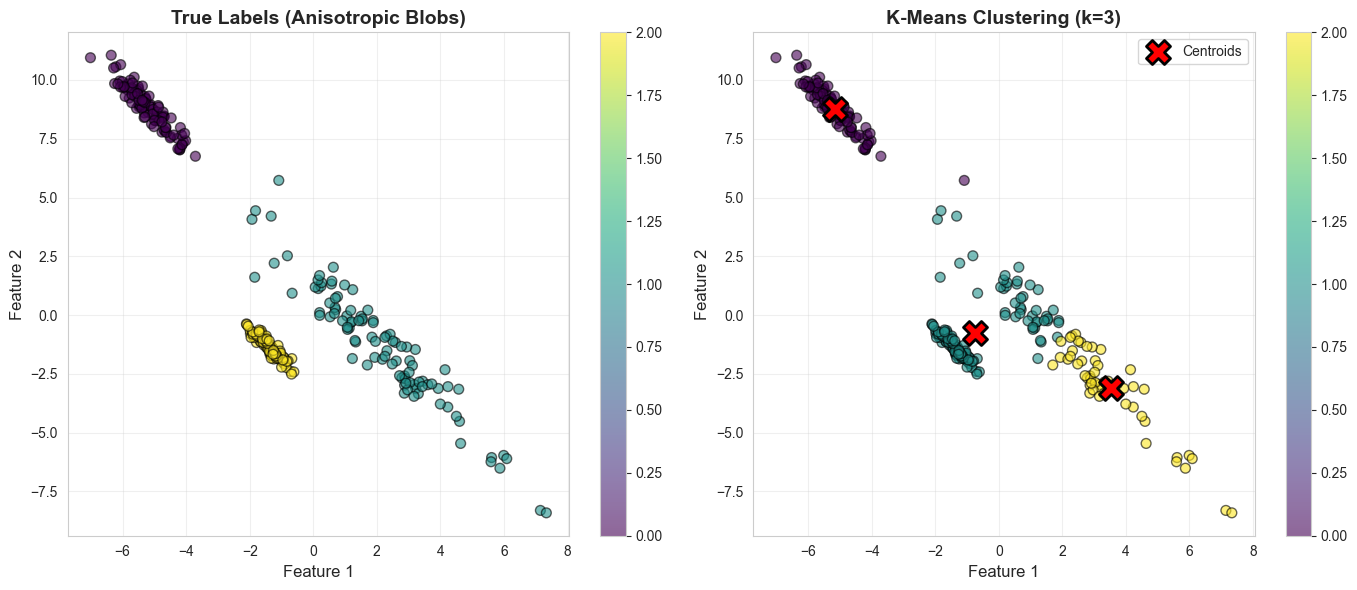

Silhouette Score: 0.678

K-Means struggles with anisotropic (stretched/elongated) clusters
   Reason: K-Means assumes spherical clusters of similar size
   The algorithm tries to minimize distance to centroids, not capture shape


In [8]:
# Generate anisotropic data
X_aniso, y_aniso = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# Apply transformation to create anisotropy
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X_aniso, transformation)

# Apply K-Means
kmeans_aniso = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_aniso = kmeans_aniso.fit_predict(X_aniso)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# True labels
scatter1 = axes[0].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_aniso, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].set_title('True Labels (Anisotropic Blobs)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0])

# K-Means labels
scatter2 = axes[1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=labels_aniso, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[1].scatter(kmeans_aniso.cluster_centers_[:, 0], kmeans_aniso.cluster_centers_[:, 1], 
                c='red', marker='X', s=300, edgecolors='black', linewidths=2, label='Centroids')
axes[1].set_xlabel('Feature 1', fontsize=12)
axes[1].set_ylabel('Feature 2', fontsize=12)
axes[1].set_title('K-Means Clustering (k=3)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()

print(f"Silhouette Score: {silhouette_score(X_aniso, labels_aniso):.3f}")
print(f"\nK-Means struggles with anisotropic (stretched/elongated) clusters")
print(f"   Reason: K-Means assumes spherical clusters of similar size")
print(f"   The algorithm tries to minimize distance to centroids, not capture shape")

## Problem 4: Concentric Circles (Non-Convex Clusters)

**Dataset:** Two concentric circles (400 samples)

**Tasks:**
1. Generate concentric circles data
2. Apply K-Means with k=2
3. Visualize and analyze the failure
4. Explain why K-Means fails on this data

**Hints:**
- Use `make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)`
- Use `KMeans(n_clusters=2, random_state=42)`
- K-Means cannot handle non-convex shapes!
- This is where DBSCAN or Spectral Clustering excel

### Solution 4

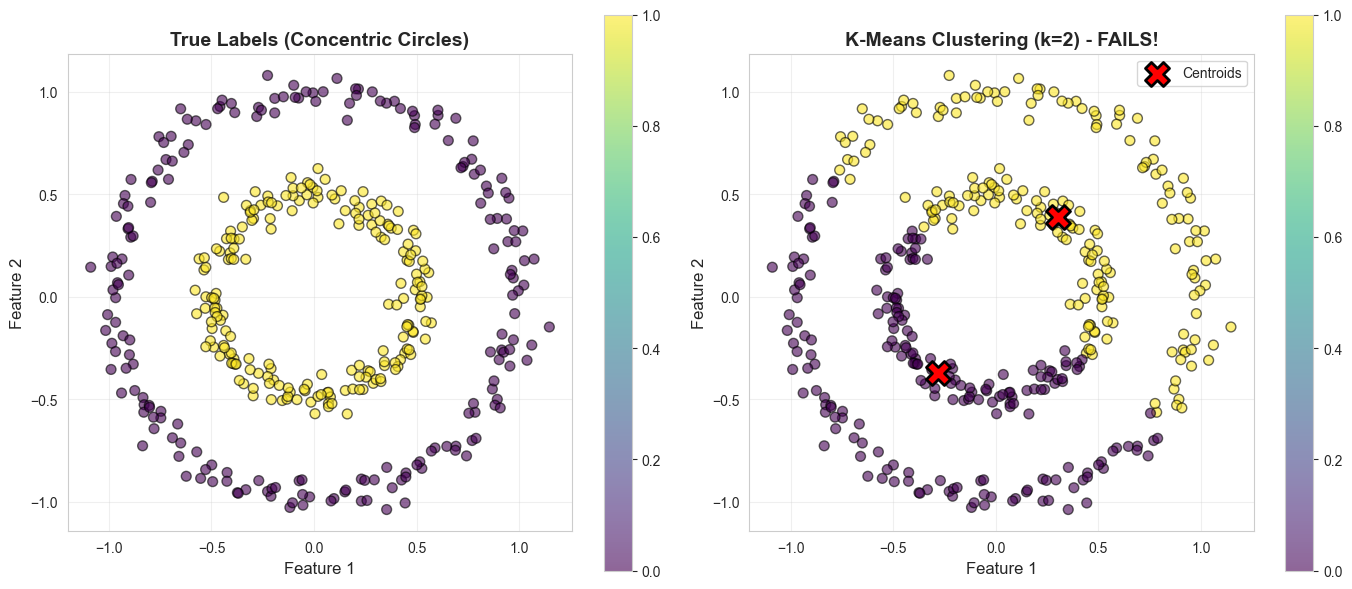

Silhouette Score: 0.354

K-Means FAILS on concentric circles!
   Reason: K-Means cannot handle non-convex (non-spherical) cluster shapes
   The algorithm splits circles vertically instead of separating inner/outer
   Solution: Use DBSCAN or Spectral Clustering for such data


In [9]:
# Generate concentric circles
X_circles, y_circles = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

# Apply K-Means
kmeans_circles = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_circles = kmeans_circles.fit_predict(X_circles)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# True labels
scatter1 = axes[0].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].set_title('True Labels (Concentric Circles)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')
plt.colorbar(scatter1, ax=axes[0])

# K-Means labels
scatter2 = axes[1].scatter(X_circles[:, 0], X_circles[:, 1], c=labels_circles, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[1].scatter(kmeans_circles.cluster_centers_[:, 0], kmeans_circles.cluster_centers_[:, 1], 
                c='red', marker='X', s=300, edgecolors='black', linewidths=2, label='Centroids')
axes[1].set_xlabel('Feature 1', fontsize=12)
axes[1].set_ylabel('Feature 2', fontsize=12)
axes[1].set_title('K-Means Clustering (k=2) - FAILS!', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_aspect('equal')
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()

print(f"Silhouette Score: {silhouette_score(X_circles, labels_circles):.3f}")
print(f"\nK-Means FAILS on concentric circles!")
print(f"   Reason: K-Means cannot handle non-convex (non-spherical) cluster shapes")
print(f"   The algorithm splits circles vertically instead of separating inner/outer")
print(f"   Solution: Use DBSCAN or Spectral Clustering for such data")

---
# Part 2: DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) excels at:
- Arbitrary-shaped clusters
- Clusters of different sizes and densities
- Detecting outliers/noise
- No need to specify number of clusters

We'll test it on 4 datasets where K-Means struggles.

## Problem 5: Crescent Moons (Non-Convex Shapes)

**Dataset:** Two interleaving crescent moons (300 samples)

**Tasks:**
1. Generate moons dataset
2. Apply both K-Means and DBSCAN
3. Compare their performance
4. Tune DBSCAN parameters (eps and min_samples)

**Hints:**
- Use `make_moons(n_samples=300, noise=0.05, random_state=42)`
- For K-Means: `KMeans(n_clusters=2, random_state=42)`
- For DBSCAN: `DBSCAN(eps=0.2, min_samples=5)`
- Try different eps values: [0.1, 0.2, 0.3]
- Noise points in DBSCAN are labeled as -1

### Solution 5

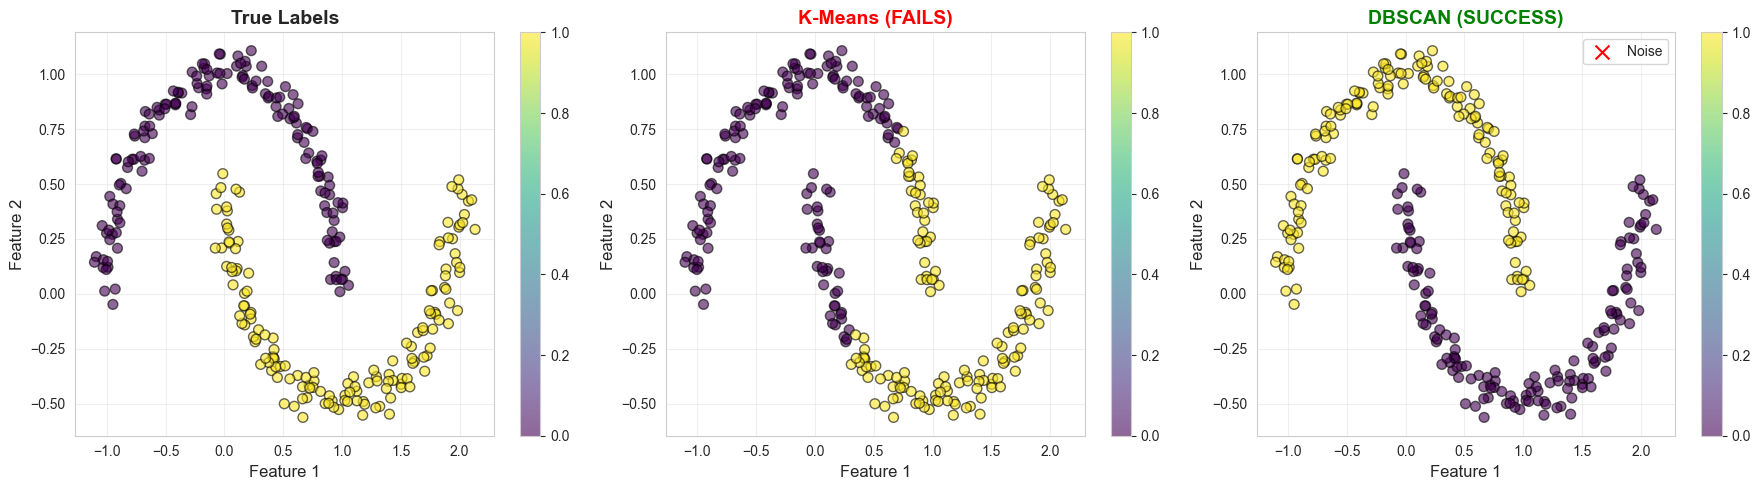

K-Means Silhouette Score: 0.488
DBSCAN Silhouette Score: 0.331
DBSCAN found 2 clusters and 0 noise points

DBSCAN successfully separates crescent moons where K-Means fails!


In [10]:
# Generate moons data
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply K-Means
kmeans_moons = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_kmeans_moons = kmeans_moons.fit_predict(X_moons)

# Apply DBSCAN
dbscan_moons = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan_moons = dbscan_moons.fit_predict(X_moons)

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# True labels
scatter1 = axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[0].set_title('True Labels', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0])

# K-Means
scatter2 = axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_kmeans_moons, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[1].set_title('K-Means (FAILS)', fontsize=14, fontweight='bold', color='red')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1])

# DBSCAN
scatter3 = axes[2].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_dbscan_moons, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
# Mark noise points
noise_mask = labels_dbscan_moons == -1
axes[2].scatter(X_moons[noise_mask, 0], X_moons[noise_mask, 1], c='red', marker='x', s=100, label='Noise')
axes[2].set_title('DBSCAN (SUCCESS)', fontsize=14, fontweight='bold', color='green')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[2])

for ax in axes:
    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('Feature 2', fontsize=12)

plt.tight_layout()
plt.show()

# Calculate scores (excluding noise for DBSCAN)
mask_dbscan = labels_dbscan_moons != -1
if len(np.unique(labels_dbscan_moons[mask_dbscan])) > 1:
    sil_dbscan = silhouette_score(X_moons[mask_dbscan], labels_dbscan_moons[mask_dbscan])
else:
    sil_dbscan = 0

print(f"K-Means Silhouette Score: {silhouette_score(X_moons, labels_kmeans_moons):.3f}")
print(f"DBSCAN Silhouette Score: {sil_dbscan:.3f}")
print(f"DBSCAN found {len(np.unique(labels_dbscan_moons[mask_dbscan]))} clusters and {np.sum(noise_mask)} noise points")
print(f"\nDBSCAN successfully separates crescent moons where K-Means fails!")

## Problem 6: Concentric Circles with DBSCAN

**Dataset:** Two concentric circles (same as Problem 4)

**Tasks:**
1. Use the concentric circles data
2. Apply DBSCAN with appropriate parameters
3. Compare with K-Means results
4. Experiment with different eps values

**Hints:**
- Use `make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)`
- Try `DBSCAN(eps=0.15, min_samples=5)`
- Visualize how eps affects clustering
- DBSCAN should separate inner and outer circles correctly

### Solution 6

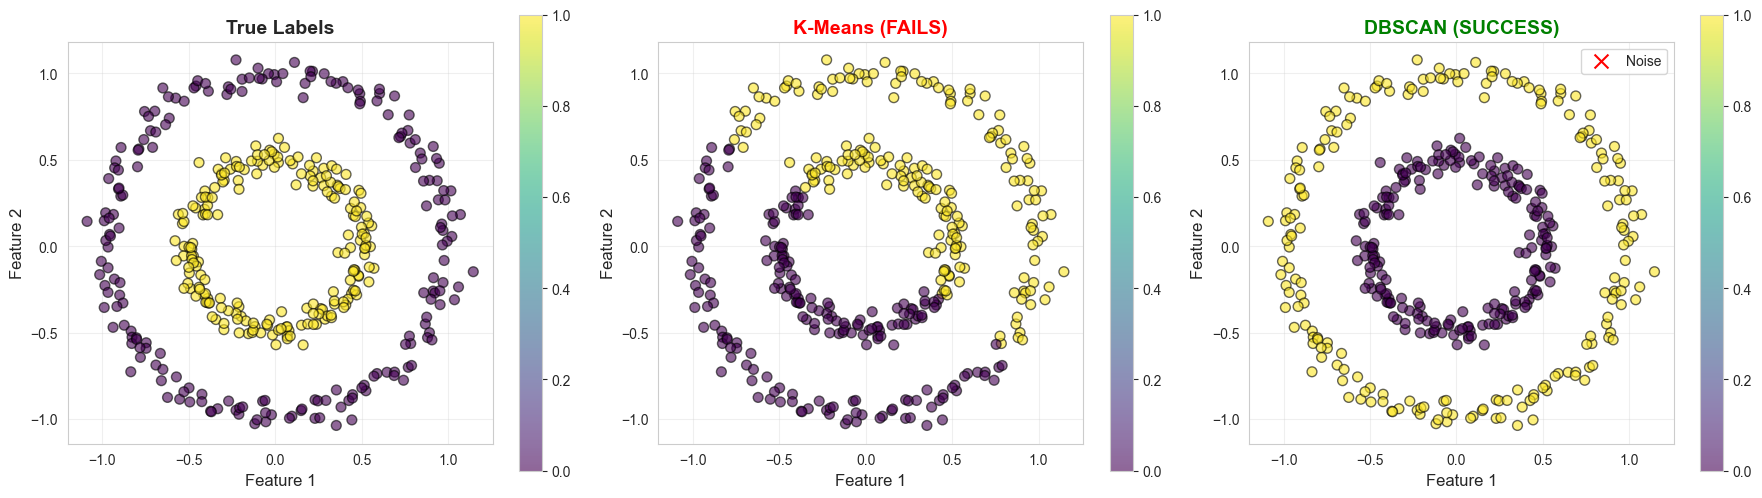

K-Means Silhouette Score: 0.354
DBSCAN Silhouette Score: 0.111
DBSCAN found 2 clusters and 0 noise points

DBSCAN correctly separates inner and outer circles!


In [11]:
# We already have X_circles and y_circles from Problem 4
# Apply DBSCAN
dbscan_circles = DBSCAN(eps=0.15, min_samples=5)
labels_dbscan_circles = dbscan_circles.fit_predict(X_circles)

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# True labels
scatter1 = axes[0].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[0].set_title('True Labels', fontsize=14, fontweight='bold')
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0])

# K-Means (from Problem 4)
scatter2 = axes[1].scatter(X_circles[:, 0], X_circles[:, 1], c=labels_circles, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[1].set_title('K-Means (FAILS)', fontsize=14, fontweight='bold', color='red')
axes[1].set_aspect('equal')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1])

# DBSCAN
scatter3 = axes[2].scatter(X_circles[:, 0], X_circles[:, 1], c=labels_dbscan_circles, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
noise_mask = labels_dbscan_circles == -1
axes[2].scatter(X_circles[noise_mask, 0], X_circles[noise_mask, 1], c='red', marker='x', s=100, label='Noise')
axes[2].set_title('DBSCAN (SUCCESS)', fontsize=14, fontweight='bold', color='green')
axes[2].legend()
axes[2].set_aspect('equal')
axes[2].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[2])

for ax in axes:
    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('Feature 2', fontsize=12)

plt.tight_layout()
plt.show()

mask_dbscan = labels_dbscan_circles != -1
if len(np.unique(labels_dbscan_circles[mask_dbscan])) > 1:
    sil_dbscan = silhouette_score(X_circles[mask_dbscan], labels_dbscan_circles[mask_dbscan])
else:
    sil_dbscan = 0

print(f"K-Means Silhouette Score: {silhouette_score(X_circles, labels_circles):.3f}")
print(f"DBSCAN Silhouette Score: {sil_dbscan:.3f}")
print(f"DBSCAN found {len(np.unique(labels_dbscan_circles[mask_dbscan]))} clusters and {np.sum(noise_mask)} noise points")
print(f"\nDBSCAN correctly separates inner and outer circles!")

## Problem 7: Clusters with Varied Density

**Dataset:** 3 clusters with different densities (400 samples)

**Tasks:**
1. Generate clusters with varying densities
2. Apply K-Means and DBSCAN
3. Compare their ability to handle density variations
4. Analyze the trade-offs

**Hints:**
- Use `make_blobs()` with `cluster_std=[0.5, 1.5, 3.0]` for different densities
- K-Means: `KMeans(n_clusters=3, random_state=42)`
- DBSCAN: `DBSCAN(eps=0.5, min_samples=5)`
- DBSCAN may struggle with varied densities (single eps for all clusters)

### Solution 7

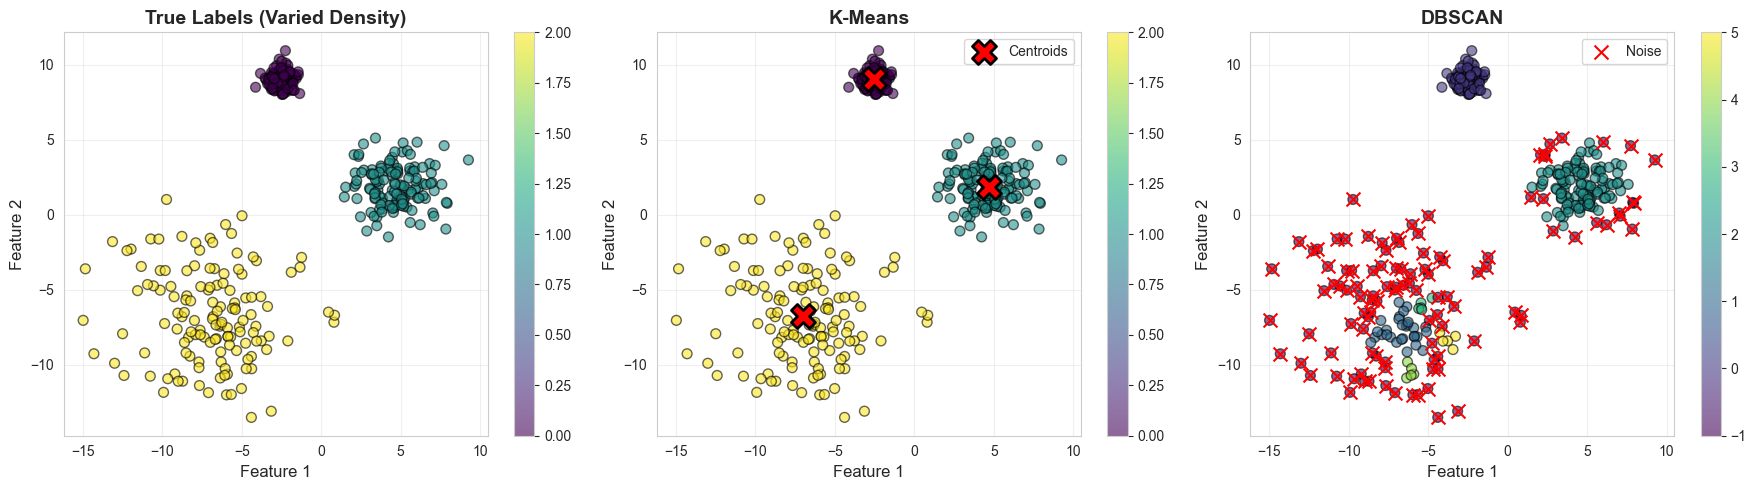

K-Means Silhouette Score: 0.761
DBSCAN Silhouette Score: 0.783
DBSCAN found 6 clusters and 108 noise points

Trade-off: K-Means handles varied densities better (uniform treatment)
   DBSCAN may miss sparse clusters or over-segment dense ones with single eps


In [12]:
# Generate varied density data
X_varied, y_varied = make_blobs(n_samples=400, n_features=2, centers=3, cluster_std=[0.5, 1.5, 3.0], random_state=42)

# Apply K-Means
kmeans_varied = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans_varied = kmeans_varied.fit_predict(X_varied)

# Apply DBSCAN
dbscan_varied = DBSCAN(eps=0.8, min_samples=5)
labels_dbscan_varied = dbscan_varied.fit_predict(X_varied)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# True labels
scatter1 = axes[0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[0].set_title('True Labels (Varied Density)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0])

# K-Means
scatter2 = axes[1].scatter(X_varied[:, 0], X_varied[:, 1], c=labels_kmeans_varied, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[1].scatter(kmeans_varied.cluster_centers_[:, 0], kmeans_varied.cluster_centers_[:, 1], 
                c='red', marker='X', s=300, edgecolors='black', linewidths=2, label='Centroids')
axes[1].set_title('K-Means', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1])

# DBSCAN
scatter3 = axes[2].scatter(X_varied[:, 0], X_varied[:, 1], c=labels_dbscan_varied, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
noise_mask = labels_dbscan_varied == -1
axes[2].scatter(X_varied[noise_mask, 0], X_varied[noise_mask, 1], c='red', marker='x', s=100, label='Noise')
axes[2].set_title('DBSCAN', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[2])

for ax in axes:
    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('Feature 2', fontsize=12)

plt.tight_layout()
plt.show()

mask_dbscan = labels_dbscan_varied != -1
print(f"K-Means Silhouette Score: {silhouette_score(X_varied, labels_kmeans_varied):.3f}")
if len(np.unique(labels_dbscan_varied[mask_dbscan])) > 1:
    print(f"DBSCAN Silhouette Score: {silhouette_score(X_varied[mask_dbscan], labels_dbscan_varied[mask_dbscan]):.3f}")
print(f"DBSCAN found {len(np.unique(labels_dbscan_varied[mask_dbscan]))} clusters and {np.sum(noise_mask)} noise points")
print(f"\nTrade-off: K-Means handles varied densities better (uniform treatment)")
print(f"   DBSCAN may miss sparse clusters or over-segment dense ones with single eps")

## Problem 8: Data with Outliers/Noise

**Dataset:** 3 well-separated clusters + random noise points (350 samples)

**Tasks:**
1. Generate clustered data with added noise
2. Apply K-Means and DBSCAN
3. Compare outlier detection capabilities
4. Analyze robustness to noise

**Hints:**
- Use `make_blobs()` for main clusters + `np.random.uniform()` for noise
- K-Means: `KMeans(n_clusters=3, random_state=42)`
- DBSCAN: `DBSCAN(eps=0.5, min_samples=5)`
- K-Means assigns all points to clusters (no outlier detection)
- DBSCAN labels outliers as -1 (noise)

### Solution 8

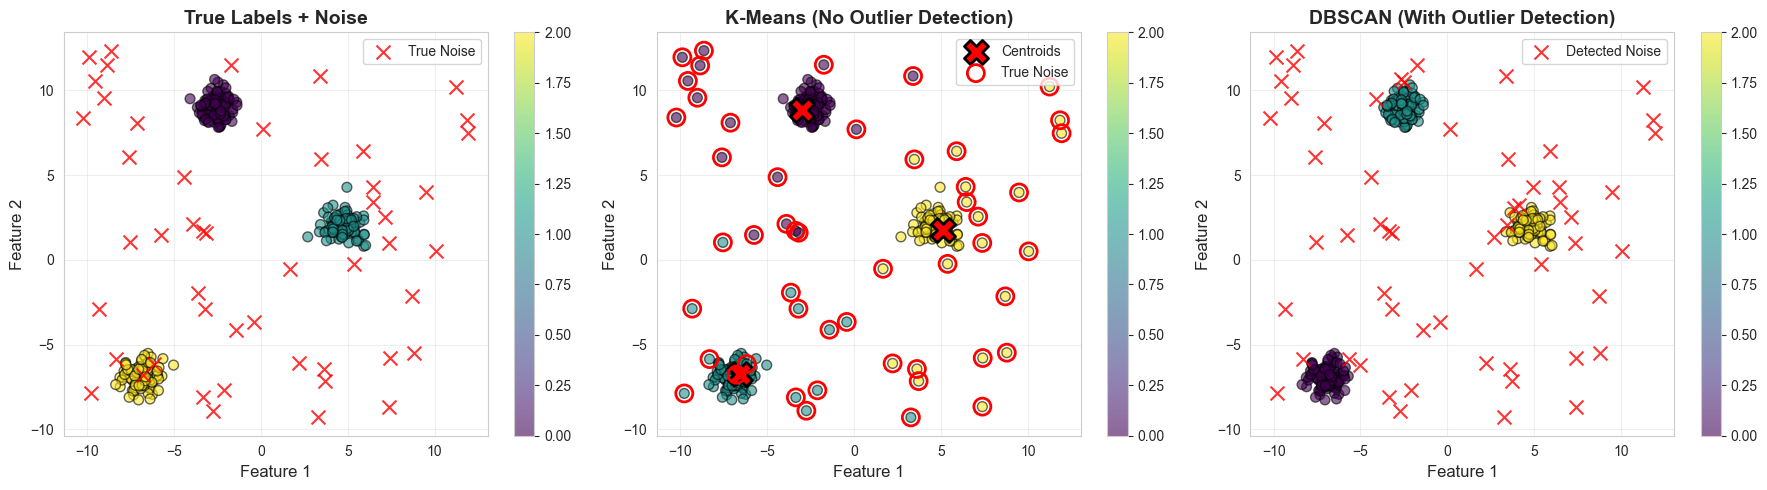

True noise points: 50
DBSCAN detected as noise: 58
Correctly identified noise: 48/50 (96.0%)

DBSCAN excels at outlier detection, K-Means forces all points into clusters


In [13]:
# Generate data with noise
np.random.seed(42)
X_clean, y_clean = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.6, random_state=42)

# Add noise points
noise_points = np.random.uniform(low=X_clean.min()-2, high=X_clean.max()+2, size=(50, 2))
X_noisy = np.vstack([X_clean, noise_points])
y_noisy = np.hstack([y_clean, np.full(50, -1)])  # -1 for noise

# Apply K-Means
kmeans_noisy = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans_noisy = kmeans_noisy.fit_predict(X_noisy)

# Apply DBSCAN
dbscan_noisy = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan_noisy = dbscan_noisy.fit_predict(X_noisy)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# True labels (with noise marked)
scatter1 = axes[0].scatter(X_noisy[y_noisy != -1, 0], X_noisy[y_noisy != -1, 1], 
                          c=y_noisy[y_noisy != -1], cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[0].scatter(X_noisy[y_noisy == -1, 0], X_noisy[y_noisy == -1, 1], 
               c='red', marker='x', s=100, label='True Noise', alpha=0.8)
axes[0].set_title('True Labels + Noise', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0])

# K-Means (assigns noise to clusters)
scatter2 = axes[1].scatter(X_noisy[:, 0], X_noisy[:, 1], c=labels_kmeans_noisy, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[1].scatter(kmeans_noisy.cluster_centers_[:, 0], kmeans_noisy.cluster_centers_[:, 1], 
                c='red', marker='X', s=300, edgecolors='black', linewidths=2, label='Centroids')
# Highlight where true noise points were assigned
axes[1].scatter(X_noisy[y_noisy == -1, 0], X_noisy[y_noisy == -1, 1], 
               facecolors='none', edgecolors='red', s=150, linewidths=2, label='True Noise')
axes[1].set_title('K-Means (No Outlier Detection)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1])

# DBSCAN (detects noise)
scatter3 = axes[2].scatter(X_noisy[labels_dbscan_noisy != -1, 0], X_noisy[labels_dbscan_noisy != -1, 1], 
                          c=labels_dbscan_noisy[labels_dbscan_noisy != -1], cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[2].scatter(X_noisy[labels_dbscan_noisy == -1, 0], X_noisy[labels_dbscan_noisy == -1, 1], 
               c='red', marker='x', s=100, label='Detected Noise', alpha=0.8)
axes[2].set_title('DBSCAN (With Outlier Detection)', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[2])

for ax in axes:
    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('Feature 2', fontsize=12)

plt.tight_layout()
plt.show()

# Calculate how many true noise points were detected
true_noise_indices = np.where(y_noisy == -1)[0]
detected_as_noise = np.sum(labels_dbscan_noisy[true_noise_indices] == -1)

print(f"True noise points: {len(true_noise_indices)}")
print(f"DBSCAN detected as noise: {np.sum(labels_dbscan_noisy == -1)}")
print(f"Correctly identified noise: {detected_as_noise}/{len(true_noise_indices)} ({100*detected_as_noise/len(true_noise_indices):.1f}%)")
print(f"\nDBSCAN excels at outlier detection, K-Means forces all points into clusters")

---
# Summary: When to Use Each Algorithm

## K-Means
**Use when:**
- Clusters are spherical/globular
- Clusters are similar in size
- Number of clusters is known
- Fast computation is needed
- Data has no outliers

**Avoid when:**
- Clusters have arbitrary shapes (moons, circles)
- Clusters have very different sizes or densities
- Data contains many outliers
- Number of clusters is unknown

## DBSCAN
**Use when:**
- Clusters have arbitrary shapes
- Number of clusters is unknown
- Data contains outliers/noise
- Outlier detection is important
- Clusters are well-separated by density

**Avoid when:**
- Clusters have very different densities
- High-dimensional data (curse of dimensionality)
- Parameters (eps, min_samples) are hard to tune
- All points must be assigned to clusters

## Key Takeaways
1. **No single algorithm is best for all data**
2. **Visualize your data** before choosing an algorithm
3. **K-Means**: Fast, simple, but assumes spherical clusters
4. **DBSCAN**: Flexible shapes, detects outliers, but sensitive to parameters
5. **Always evaluate** with metrics (silhouette score, visual inspection)
6. **Consider domain knowledge** when interpreting results